In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [2]:
#Reading the training and testing data
df1 = pd.read_csv('training.csv')
df2 = pd.read_csv('test.csv')

In [3]:
df1.head()

,article_number,article_words,topic
0,1,"open,absent,cent,cent,cent,stock,inflow,rate,k...",FOREX MARKETS
1,2,"morn,stead,end,end,day,day,day,patch,patch,pat...",MONEY MARKETS
2,3,"socc,socc,world,world,recent,law,fifa,fifa,fif...",SPORTS
3,4,"open,forint,forint,forint,forint,cent,cent,ste...",FOREX MARKETS
4,5,"morn,complet,weekend,minut,minut,minut,arrow,d...",IRRELEVANT


In [4]:
df2.head()

,article_number,article_words,topic
0,9501,"world,complet,pharmaceut,tianjin,tianjin,chin,...",IRRELEVANT
1,9502,"copy,sunday,weekend,ec,friday,eu,includ,limit,...",IRRELEVANT
2,9503,"heavy,heavy,gabriel,morn,morn,equit,cent,cent,...",FOREX MARKETS
3,9504,"research,jess,hit,anticip,comput,comput,comput...",IRRELEVANT
4,9505,"provid,provid,luxembourg,court,court,case,opin...",IRRELEVANT


In [5]:
#One Hot Encoding to quantitatively represent the topics
encoding = {'topic' : {'IRRELEVANT' : 0, 'ARTS' : 1, 'BIOGRAPHIES' : 2, 'DEFENCE' : 3, 'DOMESTIC MARKETS' : 4, 'FOREX MARKETS' : 5, 'HEALTH' : 6, 'MONEY MARKETS' : 7,'SCIENCE AND TECHNOLOGY' : 8, 'SHARE LISTINGS' : 9, 'SPORTS' :10,'BIOGRAPHIES PERSONALITIES PEOPLE':2,'ARTS CULTURE ENTERTAINMENT':1}}
encoding

{'topic': {'IRRELEVANT': 0,
  'ARTS': 1,
  'BIOGRAPHIES': 2,
  'DEFENCE': 3,
  'DOMESTIC MARKETS': 4,
  'FOREX MARKETS': 5,
  'HEALTH': 6,
  'MONEY MARKETS': 7,
  'SCIENCE AND TECHNOLOGY': 8,
  'SHARE LISTINGS': 9,
  'SPORTS': 10,
  'BIOGRAPHIES PERSONALITIES PEOPLE': 2,
  'ARTS CULTURE ENTERTAINMENT': 1}}

In [6]:
#Replacing topics with the relevant numbers for training data
df1 = df1.replace(encoding)
df1.head()

,article_number,article_words,topic
0,1,"open,absent,cent,cent,cent,stock,inflow,rate,k...",5
1,2,"morn,stead,end,end,day,day,day,patch,patch,pat...",7
2,3,"socc,socc,world,world,recent,law,fifa,fifa,fif...",10
3,4,"open,forint,forint,forint,forint,cent,cent,ste...",5
4,5,"morn,complet,weekend,minut,minut,minut,arrow,d...",0


In [7]:
#Replacing topics with the relevant numbers for testing data
df2 = df2.replace(encoding)
df2.head()

,article_number,article_words,topic
0,9501,"world,complet,pharmaceut,tianjin,tianjin,chin,...",0
1,9502,"copy,sunday,weekend,ec,friday,eu,includ,limit,...",0
2,9503,"heavy,heavy,gabriel,morn,morn,equit,cent,cent,...",5
3,9504,"research,jess,hit,anticip,comput,comput,comput...",0
4,9505,"provid,provid,luxembourg,court,court,case,opin...",0


In [8]:
data = pd.concat([df1['article_words'],df2['article_words']])

In [9]:
# Create bag of words
count = TfidfVectorizer()
bag_of_words = count.fit(data)

In [10]:
#Training and Testing split - X and Y
x_train = df1['article_words']
y_train = df1['topic'].to_list()
x_test = df2['article_words']
y_test = df2['topic'].to_list()

In [11]:
#Transforming the testing and training
x_train = bag_of_words.transform(x_train)
x_test = bag_of_words.transform(x_test)

In [12]:
#Define the clasifier and fit the data
# from sklearn.svm import LinearSVC
# classifier = LinearSVC(dual=False,random_state=0, tol=1e-5)
# model = classifier.fit(x_train,y_train)

In [13]:
# from sklearn.linear_model import SGDClassifier
# classifier = SGDClassifier()
# model = classifier.fit(x_train,y_train)

In [14]:
#Predicting the data
# y_predict = model.predict(x_test)

In [15]:
# train_accuracy_score = accuracy_score(y_train,model.predict(x_train))
# test_accuracy_score = accuracy_score(y_test,model.predict(x_test))
# print(f'Accuracy Score for training data : {train_accuracy_score}.\n')
# print(f'Accuracy Score for testing data : {test_accuracy_score}.\n')

In [16]:
# print(classification_report(y_test, y_predict))

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

In [18]:
#Model Selection 
classifiers = [KNeighborsClassifier(),RandomForestClassifier(),MultinomialNB(),LinearSVC()]
accuracy_list_without_hyperparameters = []
#iterate through models tp find cross validation score
for i,classifier in enumerate(classifiers):
    accuracies = cross_val_score(classifier,x_train,y_train,cv=5)
    accuracy_list_without_hyperparameters.append((accuracies.mean(),type(classifier).__name__))
    

/Users/vandhanavisakamurthy/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/vandhanavisakamurthy/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/vandhanavisakamurthy/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/vandhanavisakamurthy/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 t

In [40]:
accuracy_list_without_hyperparameters

[(0.7227450733948676, 'KNeighborsClassifier'),
 (0.709269684361275, 'RandomForestClassifier'),
 (0.6462146154063649, 'MultinomialNB'),
 (0.7700981110655271, 'LinearSVC')]

In [42]:
#With Hyperparameters
from sklearn.metrics import roc_auc_score
classifiers = [
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='distance'),
RandomForestClassifier(warm_start=False,n_estimators=200,min_samples_split=9,
                       min_samples_leaf=1,max_features='sqrt',max_depth=80,bootstrap=False),
MultinomialNB(alpha=1.0,class_prior=None,fit_prior=True),
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)]
accuracy_list_with_hyperparameters = []
#iterate through models tp find cross validation score
for i,classifier in enumerate(classifiers):
    accuracies = cross_val_score(classifier,x_train,y_train,cv=5)
    accuracy_list_with_hyperparameters.append((accuracies.mean(),type(classifier).__name__))


In [43]:
accuracy_list_with_hyperparameters

[(0.7227410450521056, 'KNeighborsClassifier'),
 (0.7297893105924823, 'RandomForestClassifier'),
 (0.6462146154063649, 'MultinomialNB'),
 (0.7764136020830347, 'SVC')]

In [123]:
#Final Model
model = SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [127]:
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
train_accuracy_score = accuracy_score(y_train,model.predict(x_train))
test_accuracy_score = accuracy_score(y_test,model.predict(x_test))
print(f'Accuracy Score for training data : {train_accuracy_score}.\n')
print(f'Accuracy Score for testing data : {test_accuracy_score}.\n')
ps = precision_score(y_test, y_predict,average = 'macro')
recall = recall_score(y_test, y_predict,average='macro')
f1 = f1_score(y_test, y_predict, average='macro')
print(f'Precision : {ps}.')
print(f'Recall : {recall}.')
print(f'F1 score : {f1}.')

Accuracy Score for training data : 0.8978947368421053.

Accuracy Score for testing data : 0.768.

Precision : 0.5840537176771711.
Recall : 0.4820736281262597.
F1 score : 0.5070381355796015.


/Users/vandhanavisakamurthy/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/vandhanavisakamurthy/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [114]:
from sklearn import preprocessing
#roc_suc for multiclass labels
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    #using label binarizer
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [128]:
from sklearn.metrics import confusion_matrix
import numpy as np
#custom function to calculate tpr and fpr for multi label classes
def get_tpr_and_fpr(y_test,y_predict):
    cnf_matrix = confusion_matrix(y_test, y_predict)
    FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
    FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
    TP = np.diag(cnf_matrix)
    TN = cnf_matrix.sum() - (FP + FN + TP)

    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)

    TPR = TP/(TP+FN)
    FPR = FP/(FP+TN)
    return FPR,TPR

In [167]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

classifiers = [
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='distance'),
RandomForestClassifier(warm_start=False,n_estimators=200,min_samples_split=9,
                       min_samples_leaf=1,max_features='sqrt',max_depth=80,bootstrap=False),
MultinomialNB(alpha=1.0,class_prior=None,fit_prior=True),
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)]
accuracy_list_with_hyperparameters = []
auc_scores = []
for i,classifier in enumerate(classifiers):
    auc_score = []
    model = classifier
    model.fit(x_train,y_train)
    y_predict = model.predict(x_test)
    auc_score = multiclass_roc_auc_score(y_test,y_predict)
    fpr,tpr = get_tpr_and_fpr(y_test,y_predict)
    #auc_score = auc(fpr,tpr)
    auc_scores.append((fpr,tpr,auc_score))

In [163]:
auc_scores

[(array([0.16666667, 0.00402414, 0.00206186, 0.00410678, 0.        ,
         0.07079646, 0.00823045, 0.13689095, 0.00402414, 0.0020284 ,
         0.01136364]),
  array([0.80075188, 0.33333333, 0.        , 0.61538462, 0.        ,
         0.39583333, 0.42857143, 0.66666667, 0.        , 0.28571429,
         0.96666667])),
 (array([0.33760684, 0.        , 0.        , 0.        , 0.        ,
         0.01106195, 0.00205761, 0.09976798, 0.        , 0.        ,
         0.01136364]),
  array([0.94736842, 0.        , 0.        , 0.15384615, 0.        ,
         0.14583333, 0.        , 0.75362319, 0.        , 0.        ,
         0.9       ])),
 (array([0.54273504, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.06960557, 0.        , 0.        ,
         0.00681818]),
  array([0.96992481, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.52173913, 0.        , 0.        ,
         0.76666667])),
 (array([0.19230769, 0.00201207

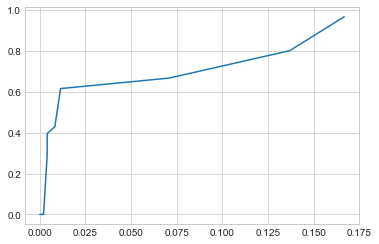

In [168]:
x = sorted(list(auc_scores[0][0]))
y = sorted(list(auc_scores[0][1]))
plt.plot(x,y)

In [169]:
plots = []
for i in range(4):
    x = sorted(list(auc_scores[i][0]))
    y = sorted(list(auc_scores[i][1]))
    plots.append((x,y))

In [156]:
plots[3][0]

[0.0,
 0.0,
 0.002012072434607646,
 0.002012072434607646,
 0.004056795131845842,
 0.004106776180698152,
 0.006818181818181818,
 0.00823045267489712,
 0.03982300884955752,
 0.09280742459396751,
 0.19230769230769232]

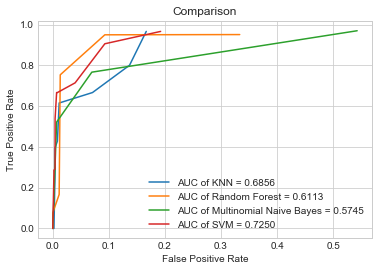

In [171]:
plt.title('Comparison')
plt.plot(plots[0][0], plots[0][1], label='AUC of KNN = %0.4f'% auc_scores[0][2])
plt.plot(plots [1][0], plots [1][1], label='AUC of Random Forest = %0.4f'% auc_scores[1][2])
plt.plot(plots [2][0], plots [2][1], label='AUC of Multinomial Naive Bayes = %0.4f'% auc_scores[2][2])
plt.plot(plots [3][0], plots [3][1], label='AUC of SVM = %0.4f'%auc_scores[3][2])
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

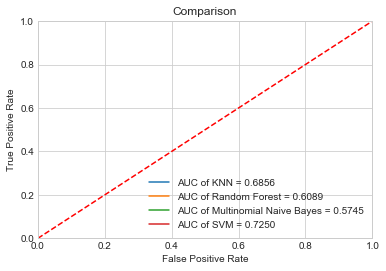

In [102]:
plt.title('Comparison')
plt.plot(auc_scores[0][0], auc_scores[0][1], label='AUC of KNN = %0.4f'% auc_scores[0][2])
plt.plot(auc_scores[1][0], auc_scores[1][1], label='AUC of Random Forest = %0.4f'% auc_scores[1][2])
plt.plot(auc_scores[2][0], auc_scores[2][1], label='AUC of Multinomial Naive Bayes = %0.4f'% auc_scores[2][2])
plt.plot(auc_scores[3][0], auc_scores[3][1], label='AUC of SVM = %0.4f'% auc_scores[3][2])
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
x_val = 